In [27]:
import pandas, numpy,matplotlib.pyplot as mpp
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15

In [28]:
def ReadData():
    data=pandas.read_csv("food-hygiene-ratings-website-top-pages-december-2016-to-february-2017.csv")
    print("Data Contains\n")
    print("{} Records\n{} Features".format(data.shape[0],data.shape[1]))
    return data
food=ReadData()
food.head()

Data Contains

95 Records
3 Features


,PageURL,Pageviews,UniquePageviews
0,/search-a-local-authority-area/en-GB/London,15921,6790
1,/search-a-local-authority-area/en-GB/South East,15377,4122
2,/search-a-local-authority-area/en-GB/North West,14007,5381
3,/search-a-local-authority-area/en-GB/South+East,13452,3677
4,/search-a-local-authority-area/en-GB/Wales,12483,6247


In [29]:
def LocExtract(data):
    allurls=food['PageURL'].tolist()
    all_locs=[]
    all_srch=[]
    for x in allurls:
        all_locs.append(x.split("/")[-1])
        all_srch.append(x.split("/")[1])
    ndf=pandas.DataFrame({
        "Region":all_locs,
        "Search_Type":all_srch,
        "Pageviews":data['Pageviews'],
        "UniquePageviews":data['UniquePageviews']})
    return ndf

In [30]:
food1=LocExtract(food)
food1.head(15)

,Region,Search_Type,Pageviews,UniquePageviews
0,London,search-a-local-authority-area,15921,6790
1,South East,search-a-local-authority-area,15377,4122
2,North West,search-a-local-authority-area,14007,5381
3,South+East,search-a-local-authority-area,13452,3677
4,Wales,search-a-local-authority-area,12483,6247
5,East+Counties,search-a-local-authority-area,9916,3176
6,East Midlands,search-a-local-authority-area,6936,2511
7,North+West,search-a-local-authority-area,6257,2330
8,413,authority-search-landing,5914,4602
9,cardiff,authority-search,5466,4457


In [5]:
def LinePlot(data):
    fet=data.columns.tolist()
    data1=data.copy()
    mpp.figure(figsize=(20,7))
    xvl=[i for i in range(len(data1['Region']))]
    mpp.title("URL View by Region",fontsize=25,color="g")
    mpp.plot(data1['Pageviews'],label='Page Views',color="b")
    mpp.plot(data1['UniquePageviews'],label='Unique Page views',color="m")
    mpp.xlabel("URL View",fontsize=20,color="g")
    mpp.xticks(xvl,data1['Region'].tolist(),rotation=90)
    mpp.ylabel("Region",fontsize=20,color="g")
    mpp.legend(loc='best')
    mpp.grid()
    mpp.show()

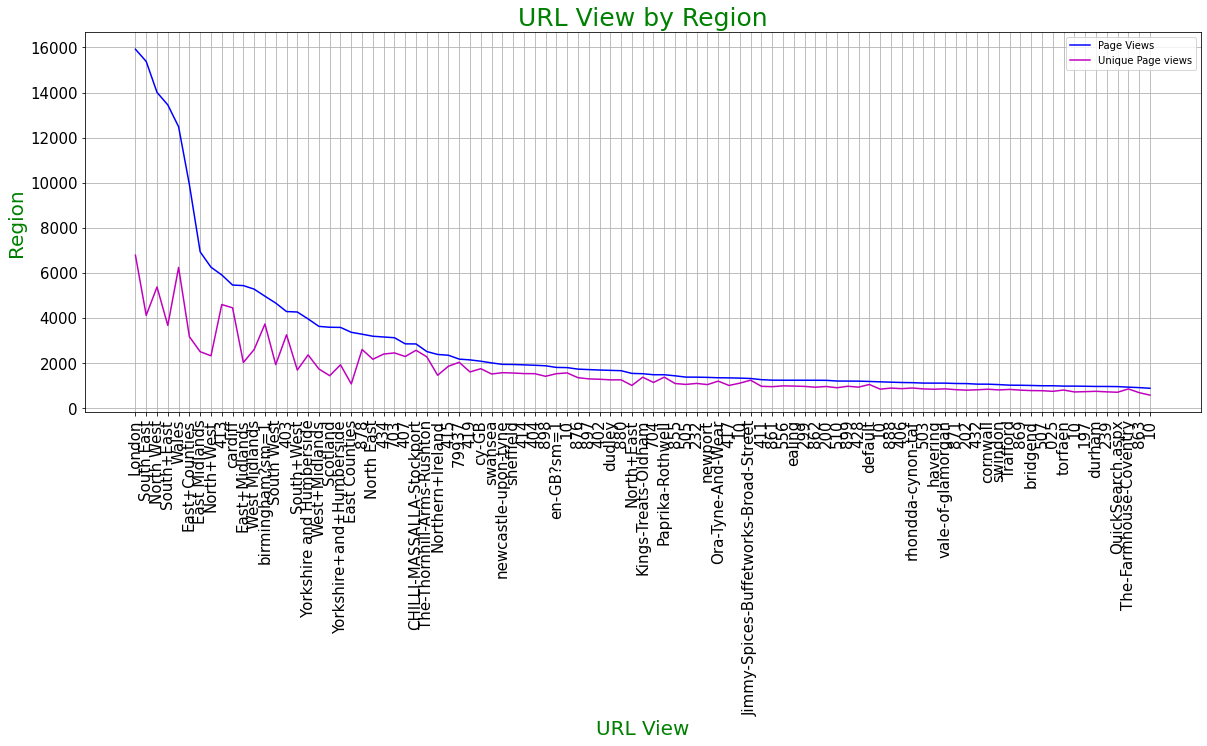

In [7]:
LinePlot(food1)

In [8]:
def BarPlot(data,ft):
    data=data.sort_values(by=ft,ascending=False)
    top10=data.iloc[:10]
    mpp.figure(figsize=(12,5))
    mpp.title("Top-10 Region with {}".format(ft),fontsize=25,color="g")
    mpp.bar(top10['Region'],top10[ft],alpha=0.5,width=0.6,color="g")
    mpp.xlabel("{}".format(ft),fontsize=20,color="g")
    mpp.ylabel("Region",fontsize=20,color="g")
    mpp.xticks(rotation=90)
    mpp.grid()
    mpp.show()
    
    least10=data.iloc[-10:]
    mpp.figure(figsize=(12,5))
    mpp.title("Least-10 Region with {}".format(ft),fontsize=25,color="m")
    mpp.bar(least10['Region'],least10[ft],alpha=0.5,width=0.6,color="m")
    mpp.xlabel("{}".format(ft),fontsize=20,color="m")
    mpp.ylabel("Region",fontsize=20,color="m")
    mpp.xticks(rotation=90)
    mpp.grid()
    mpp.show()

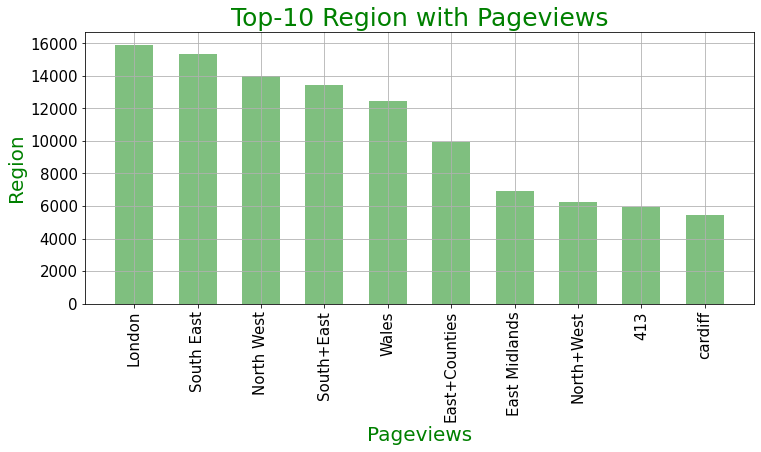

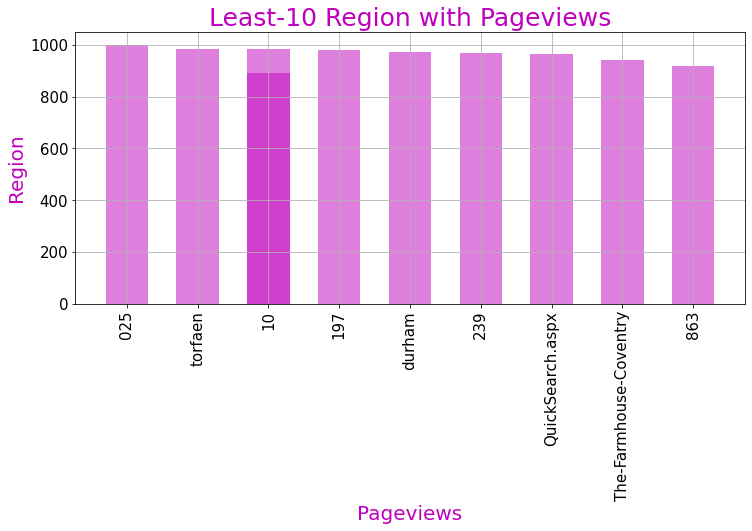

In [9]:
BarPlot(food1,"Pageviews")

In [17]:
def PiePlot(data,ft):
    font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}

    matplotlib.rc('font', **font)
    data1=data['Search_Type'].value_counts()
    data2=pandas.DataFrame({
        "Type of Search":data1.index,
        "Search Frquency":data1.tolist()
    })
    top5=data2.iloc[:5]
    clrs=["b","m","g","y","c"]
    expld=(0.1,0,0,0,0) 
    mpp.figure(figsize=(7,7))
    mpp.title("Top-5 Search Types with {}".format(ft),fontsize=25,color="g")
    mpp.pie(top5['Search Frquency'], labels=top5['Type of Search'], autopct='%1.1f%%', 
            startangle=0.6, shadow=True, colors=clrs, explode=expld)

    mpp.show()
    
    least5=data2.iloc[-5:]
    clrs=["b","m","g","y","c"]
    expld=(0.1,0,0,0,0) 
    mpp.figure(figsize=(7,7))
    mpp.title("Least-5 Search Types with {}".format(ft),fontsize=25,color="g")
    mpp.pie(least5['Search Frquency'], labels=least5['Type of Search'], autopct='%1.1f%%', 
            startangle=0.6, shadow=True, colors=clrs, explode=expld)

    mpp.show()

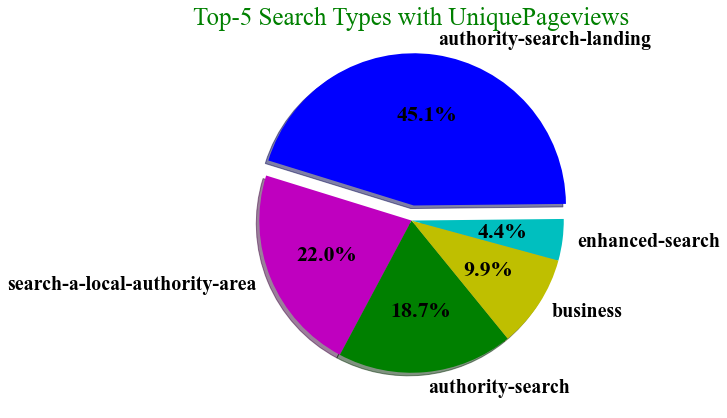

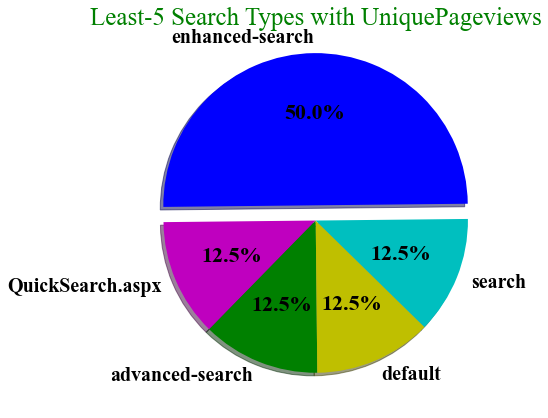

In [18]:
PiePlot(food1,'UniquePageviews')